Step 1: Loading California House Price Dataset

The read_csv() method read a csv file to dataframe and the info() method helps to get a quick description of the data such as columns, the total number of rows, each attribute type and the number of nonnull values.

In [99]:
import pandas as pd
import os

HOUSING_PATH = os.path.join("datasets", "housing")

def load_housing_data():
    csv_path = os.path.join(HOUSING_PATH, "housing.csv")
    return pd.read_csv(csv_path)

In [100]:
# load data
housing = load_housing_data()

In [101]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


As we can see there are 20640 instances in the dataset. The total_bedrooms has only 20433 non-null values (207 districts are missing), and all attributes are numerical except the ocean_proximity field (a text field). The median_house_value is the housing price, which we need to predict using our machine learning model.

Before getting to model training, let's analyse how attributes in the housing data correlate with the median house value (house price). We can easily find the standard correlation coefficient using the corr() method. Since the ocean_proximity attribute field is non-numeric, we need to drop the field to calculate the correlation.

In [102]:
def find_correlation(housing_numeric):
  # computing standard correlation coefficient
  corr_matrix = housing_numeric.corr()
  # fetch and return attribute correlates 
  # with the median housing value
  return corr_matrix["median_house_value"].sort_values(
    ascending=False)
  
# drop ocean_proximity column
housing_numeric = housing.drop("ocean_proximity", axis=1)
# find correlation coefficient
cor_coef = find_correlation(housing_numeric)
print("Correlation Coefficient::", cor_coef)

Correlation Coefficient:: median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [103]:
housing_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Heatmap:

In [104]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [105]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Saving figure attribute_heatmap_plots


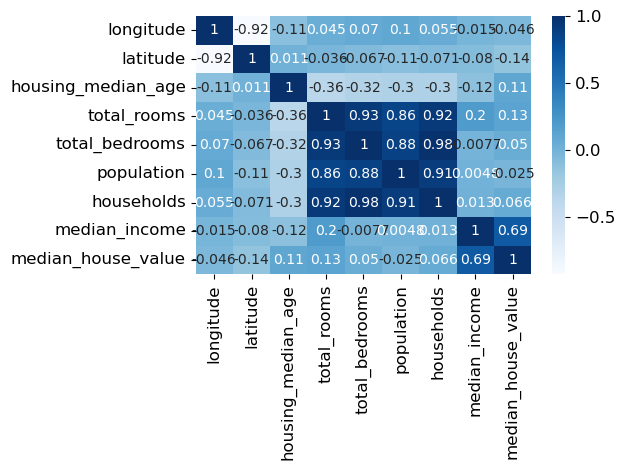

In [106]:
import seaborn as sb
corr = housing.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
save_fig("attribute_heatmap_plots")

In [107]:
# first high correlated column 'total_rooms', 'total_bedrooms', 'population', 'households'.
# second correlated column: 'median_house_value', 'median_income'
# in regression: try remove lower correlation columns like ('housing_median_age', 'longitude', 'latitude', 'ocean_proximity')

In [108]:
# Drop less correlation column: [sp1]
housing = housing.drop(["housing_median_age", "longitude", "latitude"], axis=1)
#housing = housing.drop("total_rooms_population", axis=1)
#housing = housing.drop("total_bedrooms_population", axis=1)


In [109]:
# drop ocean_proximity column
housing_numeric = housing.drop("ocean_proximity", axis=1)
# find correlation coefficient
cor_coef = find_correlation(housing_numeric)
print("Correlation Coefficient::", cor_coef)

Correlation Coefficient:: median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
households            0.065843
total_bedrooms        0.049686
population           -0.024650
Name: median_house_value, dtype: float64


Saving figure attribute_heatmap_plots_sp1


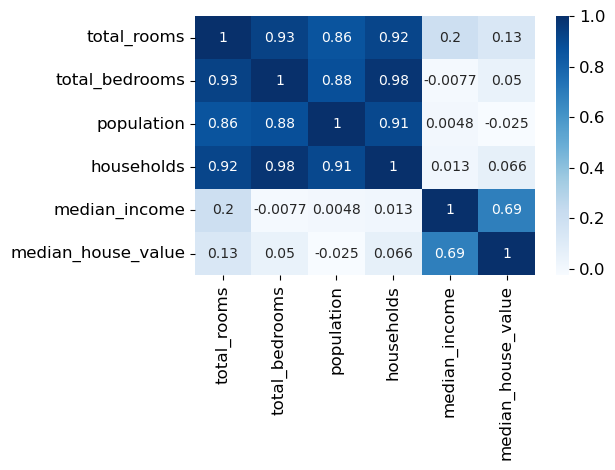

In [110]:
corr = housing.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
save_fig("attribute_heatmap_plots_sp1")

## Data Cleaning

In the book 3 options are listed:

```python
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [111]:
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

In [112]:
housing.drop(housing[housing['ocean_proximity'] == 'ISLAND'].index, inplace=True)

In [113]:
housing.info() # missing index will generate pandas and skilear error: Int64Index: 20635 entries, 0 to 20639

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20635 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rooms         20635 non-null  float64
 1   total_bedrooms      20635 non-null  float64
 2   population          20635 non-null  float64
 3   households          20635 non-null  float64
 4   median_income       20635 non-null  float64
 5   median_house_value  20635 non-null  float64
 6   ocean_proximity     20635 non-null  object 
dtypes: float64(6), object(1)
memory usage: 1.3+ MB


In [114]:
# missing index will generate pandas and skilear error: Int64Index: 20635 entries, 0 to 20639
# solve this issue:
housing.dropna(inplace=True)
housing.reset_index(drop=True, inplace=True)

In [115]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20635 entries, 0 to 20634
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rooms         20635 non-null  float64
 1   total_bedrooms      20635 non-null  float64
 2   population          20635 non-null  float64
 3   households          20635 non-null  float64
 4   median_income       20635 non-null  float64
 5   median_house_value  20635 non-null  float64
 6   ocean_proximity     20635 non-null  object 
dtypes: float64(6), object(1)
memory usage: 1.1+ MB


Here, the median house value tends to go up when the median income increases. Similarly, you can notice a small negative correlation with the latitude; the median house value has a slight tendency to go down when we go north.

# Training Models for California Housing Price Forecasting
The process of training a machine learning model involves preparing the data for ML and providing an ML algorithm. Since our aim is to predict a value from a labeled training dataset, we must use regression ML algorithms. Here we will explore a few regression models to identify a promising model based on the prediction error. We will be using following models:

 - Linear Regression Model
 - Decision Tree Regression Model
 - Random Forest Regression Model

## 1. Linear Regression Model
Let's start with a linear regression model. In our dataset, we have different sets of attributes such as median_income, total_rooms, latitude and longitude, and so on. Before using multiple features to predict median_house_value, let's start with a single feature.

From the correlation data, it is clear that median_income is a promising attribute. Let's check the scatterplot diagram between median_income and median_house_value.

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

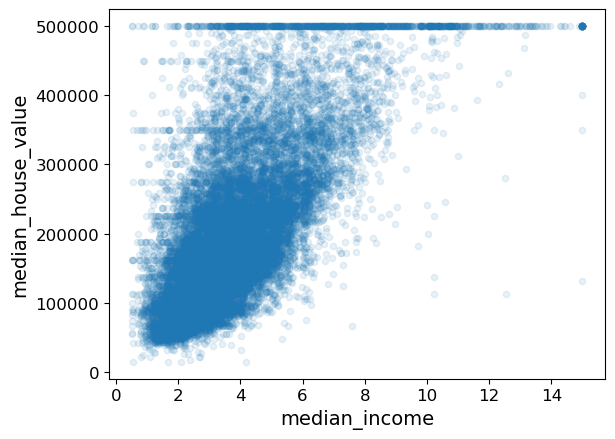

In [116]:
# scatter plot diagram
housing.plot(kind='scatter', 
             x="median_income", y="median_house_value", 
             alpha=0.1)

**From the above diagram it is clear that the correlation is very strong, has an upward trend and not too dispersed.**

Let's make use of median_income to train a linear regression model. Since median_income doesn't have any missing data, we don't need to deal with missing values.

Here, we need to get training and testing dataset for the machine learning model. Sckit-Learn provides a few functions to split the datasets into multiple subsets. The simplest function is train_test_split().

But the problem with the train_test_split method is that it is a purely random sampling method. It serves its purpose if the dataset is large enough. Our housing dataset is small and the above method may result in sampling bias. So, we need a stratified sampling method.

In stratified sampling, the right number of instances are sampled from each stratum to ensure that the test set represents the entire population. From correlation data, we understood that the median income is an important attribute to predict median housing prices. So our training and test set should represent various categories of income in the whole dataset.

The stratified shuffleSplit cross-validator object is a is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

Let's create the median income histogram for a detail analysis.




array([[<AxesSubplot:title={'center':'median_income'}>]], dtype=object)

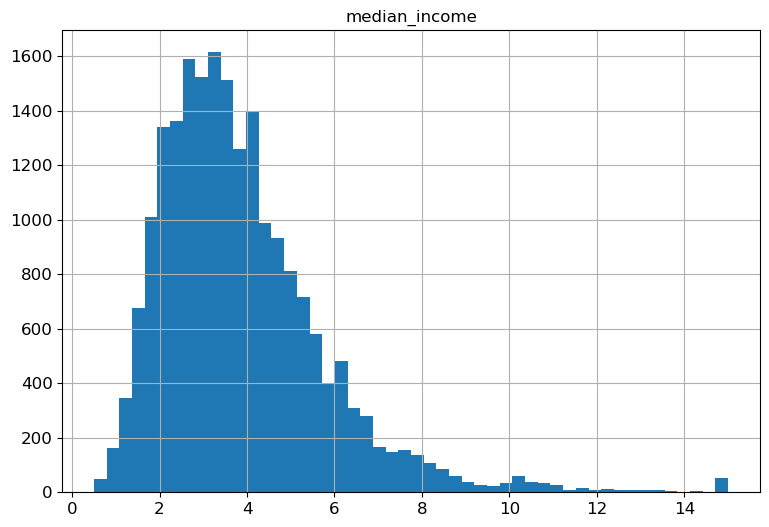

In [117]:
housing.hist(column='median_income', 
             bins=50, figsize=(9,6))

<AxesSubplot:>

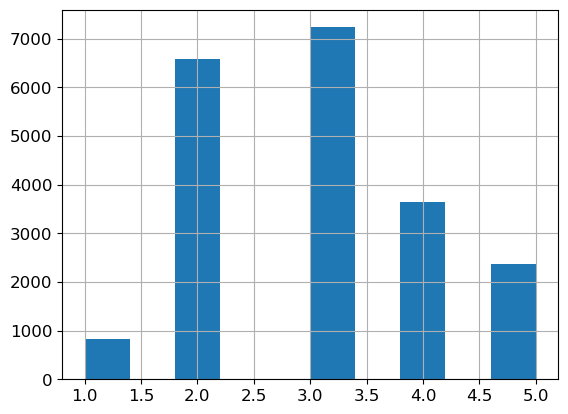

In [118]:
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

housing["income_cat"].hist()

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error

def set_income_category(housing_selected):
    # set income category based on median income
    housing_selected["income_cat"] = pd.cut(housing_selected["median_income"], 
                                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                            labels=[1, 2, 3, 4, 5])
    return housing_selected

def get_strat_train_test_dataset(housing_selected):
    # stratified sampling
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    housing_split = split.split(housing_selected, housing_selected["income_cat"])
    # get train and test dataset
    for train_index, test_index in housing_split:
        train_set = housing_selected.loc[train_index]
        test_set = housing_selected.loc[test_index]
        
    # drop income_category from train and test dataset
    for set_ in (train_set, test_set):
        set_.drop("income_cat", axis=1, inplace=True)
    
    return train_set, test_set

def sprt_train_and_label_set(train_set):
    # drop median_house_value from training data
    housing_tr = train_set.drop("median_house_value", axis=1)
    # create a new dataframe with median_house_value
    housing_labels = train_set["median_house_value"].copy()
    return housing_tr, housing_labels

def get_rmse(housing_labels, predicted_data):
    # get mean squared error to analyse prediction error
    mse = mean_squared_error(housing_labels, predicted_data)
    rmse = np.sqrt(mse)
    return rmse


# copy median_income and median_house_value
housing_selected = housing[['median_income', 'median_house_value']].copy()
# set income category based on median_icome
housing_selected = set_income_category(housing_selected)
# stratified sampling
train_set, test_set = get_strat_train_test_dataset(housing_selected)
# seperate label and data from training set
housing_tr, housing_labels = sprt_train_and_label_set(train_set)

print('Finished')

Finished


In [120]:
# Now, Let's make use of the prepared data to find the best fit and prediction using linear regression.

In [121]:
from sklearn.linear_model import LinearRegression
# linear regression model for best fit
lin_reg = LinearRegression()
lin_reg.fit(housing_tr, housing_labels)

# sample data to test from training set
sample_data = housing_tr.iloc[:5]
sample_labels = housing_labels.iloc[:5]

# predict the median_house_value
predicted_data = lin_reg.predict(sample_data)
print("Predicted Price:", predicted_data)
print("Actual Price:", list(sample_labels))

Predicted Price: [157690.03573794 200590.76253554 130476.95051429 140192.92458447
 127877.66626842]
Actual Price: [120400.0, 156500.0, 88900.0, 131900.0, 177400.0]


In [80]:
# second: 
# Predicted Price: [157690.03573794 200590.76253554 130476.95051429 140192.92458447
#  127877.66626842]
# Actual Price: [120400.0, 156500.0, 88900.0, 131900.0, 177400.0]

# third:
Predicted Price: [157690.03573794 200590.76253554 130476.95051429 140192.92458447
 127877.66626842]
Actual Price: [120400.0, 156500.0, 88900.0, 131900.0, 177400.0]

SyntaxError: invalid syntax (1747174418.py, line 7)

In [81]:
# compute the prediction error for the training data.

In [82]:
# pass the training data and identify the prediction error
predicted_data = lin_reg.predict(housing_tr)
lin_rmse = get_rmse(housing_labels, predicted_data)
print("root mean square error:", lin_rmse)

root mean square error: 83786.95955423421


In [83]:
# befor clear ['ocean_proximity'] == 'ISLAND': root mean square error: 84056.18763327331
# after clear ['ocean_proximity'] == 'ISLAND': root mean square error: 83786.95955423421

A prediction error is not very satisfying, but it is better than first.

SyntaxError: invalid syntax (1316841765.py, line 4)

In [84]:
"""
import matplotlib.pyplot as plt
# plot
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, label="population", figsize=(7,5), 
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()
"""

'\nimport matplotlib.pyplot as plt\n# plot\nhousing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, \n             s=housing["population"]/100, label="population", figsize=(7,5), \n             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)\nplt.legend()\n'

In [122]:
from sklearn.impute import SimpleImputer

# drop ocean_proximity column 
housing_num = housing.drop("ocean_proximity", axis=1)

# imputer instance
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)
housing_imputer = imputer.transform(housing_num)
print("Imputer return data type:", type(housing_imputer))

# convert back to pandas dataframe
housing_new = pd.DataFrame(
    housing_imputer, columns=housing_num.columns, index=housing_num.index)
print("New Housing Dataset:")
print(housing_new.info())

Imputer return data type: <class 'numpy.ndarray'>
New Housing Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20635 entries, 0 to 20634
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rooms         20635 non-null  float64
 1   total_bedrooms      20635 non-null  float64
 2   population          20635 non-null  float64
 3   households          20635 non-null  float64
 4   median_income       20635 non-null  float64
 5   median_house_value  20635 non-null  float64
 6   income_cat          20635 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB
None


In [123]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


def transformation_pipeline():
    # pipeline execution
    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler())
    ])
    return num_pipeline


# get housing data
# housing = fetch_housing_data()
# set income category based on median_icome
housing = set_income_category(housing)
# stratified sampling
train_set, test_set = get_strat_train_test_dataset(housing)
# seperate label and data from training set
housing_tr, housing_labels = sprt_train_and_label_set(train_set)
# drop ocean_proximity 
housing_num = housing_tr.drop("ocean_proximity", axis=1)
# numeric pipeline execution
num_pipeline = transformation_pipeline()
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [124]:
from sklearn.linear_model import LinearRegression

# linear regression model to identify best fit
lin_reg = LinearRegression()
lin_reg.fit(housing_num_tr, housing_labels)
# pass the prepared data and predict the housing price
predicted_data = lin_reg.predict(housing_num_tr)
# pass the predicted data and identify the prediction error
lin_rmse = get_rmse(housing_labels, predicted_data)
print("Linear Regression Prediction error:", lin_rmse)

Linear Regression Prediction error: 79167.94201569271


In [88]:
# befor Linear Regression Prediction error: 69957.72079714121
# after Linear Regression Prediction error: 69725.06911394256

In [125]:
housing[["ocean_proximity"]].value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
dtype: int64

In [90]:
# Scikit-Learn OneHotEncoder class to convert categorical values into one-hot vectors.

from sklearn.preprocessing import OneHotEncoder

# fetch ocean_proximity
housing_cat = housing[["ocean_proximity"]]
# one hot encoder
cat_encoder = OneHotEncoder()
housing_cat_encoder = cat_encoder.fit_transform(housing_cat)
# convert sparse matrix to array to dispaly the result
result = housing_cat_encoder.toarray()
print("Data:")
print(result)
category_list = cat_encoder.categories_
print("Category List::", category_list)

Data:
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]
Category List:: [array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]


In [91]:
# With the help of the CoulmnTransformer class, the numeric columns will be transformed using the num_pipeline, 
# and the categorical columns should be transformed using the OneHotEncoder class. Let's look at the code:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing_tr)

In [92]:
housing.describe()

,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000
mean,2636.020208,536.867071,1425.660286,499.593700,3.870944,206813.756288
std,2181.794772,419.432146,1132.530137,382.357072,1.899961,115372.499511
min,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,1448.000000,297.000000,787.000000,280.000000,2.563100,119600.000000
50%,2127.000000,435.000000,1166.000000,409.000000,3.535200,179700.000000
75%,3148.000000,644.000000,1725.000000,605.000000,4.743700,264700.000000
max,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


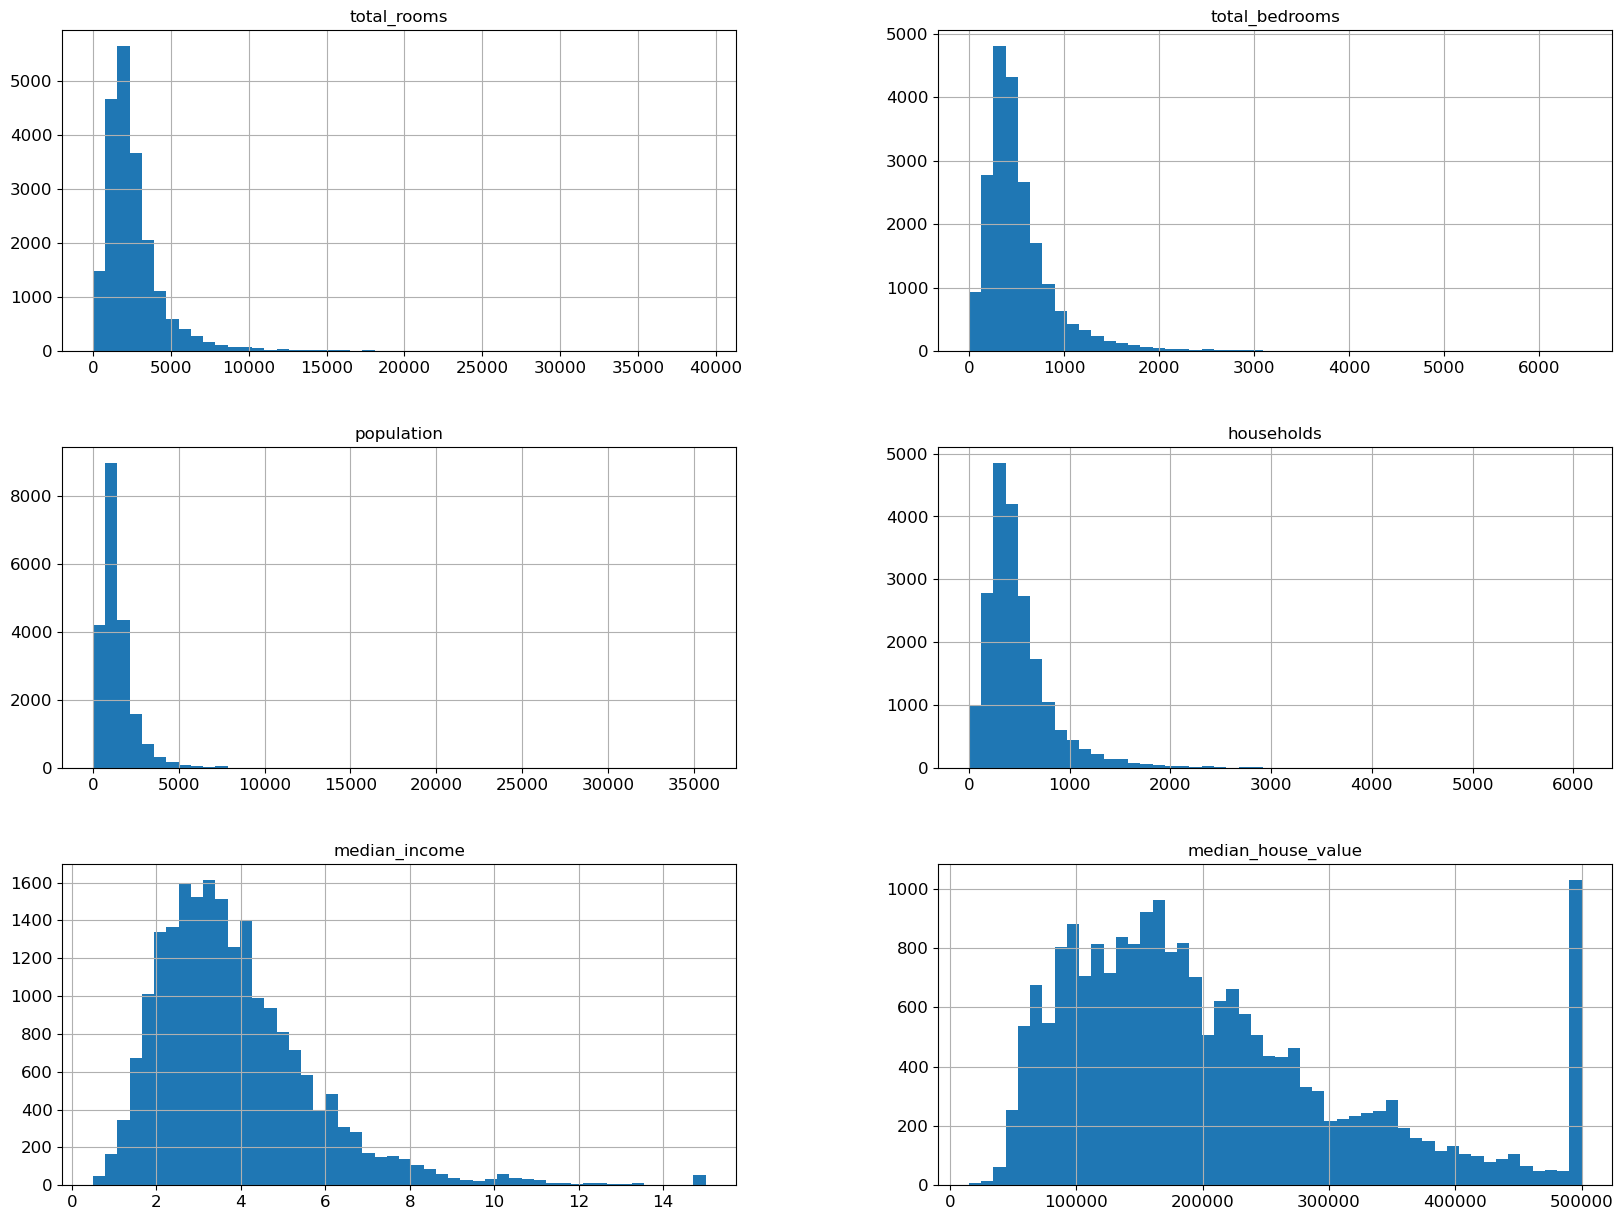

In [93]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [94]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix,households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


def transformation_pipeline():
    # pipeline execution
    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler())
    ])
    return num_pipeline

def complete_pipeline(num_pipeline, num_attribs, cat_attribs):
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])
    return full_pipeline


# numeric pipeline execution
num_pipeline = transformation_pipeline()
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
# pipeline execution of numeric and column attribute
full_pipeline = complete_pipeline(num_pipeline, num_attribs, cat_attribs)
housing_prepared = full_pipeline.fit_transform(housing_tr)

IndexError: index 6 is out of bounds for axis 1 with size 5

In [96]:
# linear regression model to identify best fit
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
# pass the prepared data and predict the housing price
predicted_data = lin_reg.predict(housing_prepared)
# pass the predicted data and identify the prediction error
lin_rmse = get_rmse(housing_labels, predicted_data)
print("Linear Regression Prediction error:", lin_rmse)

Linear Regression Prediction error: 71119.5509245694


In [97]:
# first: Linear Regression Prediction error: 68627.87390018745
# second: Linear Regression Prediction error: 68418.17842776241

In [98]:
from sklearn.tree import DecisionTreeRegressor

# Decision tree regressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
# predict the price
predicted_data = tree_reg.predict(housing_prepared)
# pass the predicted data and identify the prediction error
tree_rmse = get_rmse(predicted_data, housing_labels)
print("Decision tree prediction error", tree_rmse)

Decision tree prediction error 0.0


In [59]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
# predict the price
predicted_data = forest_reg.predict(housing_prepared)
# identify the prediction error
rf_rmse = get_rmse(housing_labels, predicted_data)
print("Random forest prediction error", rf_rmse)

Random forest prediction error 18577.559149145716


In [ ]:
# first: Random forest prediction error 18694.75574646658
# second: Random forest prediction error 18577.559149145716

In [60]:
from sklearn.model_selection import cross_val_score

def cross_validation(reg_model, housing_prepared, housing_labels):
    scores = cross_val_score(
      reg_model, housing_prepared,
      housing_labels,
      scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    print("Scores:", rmse_scores)
    print("Mean:", rmse_scores.mean())
    print("StandardDeviation:", rmse_scores.std())

print("Decision Tree Regression Model Cross Validation")
cross_validation(tree_reg, housing_prepared, housing_labels)
print("Linear Regression Model Cross Validation")
cross_validation(lin_reg, housing_prepared, housing_labels)
print("Random Forest Regression Model Cross Validation")
cross_validation(forest_reg, housing_prepared, housing_labels)

Decision Tree Regression Model Cross Validation
Scores: [70226.61330225 70245.5341887  69860.8959562  68355.41835388
 67138.88437641 71973.50591888 72724.64323332 69845.50706278
 72219.79009754 71871.61566028]
Mean: 70446.240815024
StandardDeviation: 1697.1446903338845
Linear Regression Model Cross Validation
Scores: [72624.2383692  68476.46953478 66355.17863333 69897.5390847
 65320.48083569 69119.272106   64129.79661213 71763.13150562
 71959.99885653 67324.67922491]
Mean: 68697.07847628833
StandardDeviation: 2770.6928137591835
Random Forest Regression Model Cross Validation
Scores: [52171.53571214 49643.00059663 49837.73080513 49006.88414248
 47447.07507844 50641.78916621 47523.16436657 49758.33458987
 52589.49408526 50463.97752557]
Mean: 49908.2986068305
StandardDeviation: 1606.6961611447873


In [ ]:
# first:
Decision Tree Regression Model Cross Validation
Scores: [72193.11163453 71190.16921272 68080.62215894 70820.88858781
 70099.56996952 76399.27646112 70858.67911456 73843.59740405
 66100.46838114 69291.68434405]
Mean: 70887.80672684235
StandardDeviation: 2736.446328183131
Linear Regression Model Cross Validation
Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
StandardDeviation: 2880.32820981807
Random Forest Regression Model Cross Validation
Scores: [51523.76043126 49374.20880103 46834.55388079 52153.49825257
 47206.46549481 52023.10270221 52464.47642681 49922.05898792
 48444.20313098 53301.7056318 ]
Mean: 50324.80337401925
StandardDeviation: 2182.0713651951464
    
# second:
Decision Tree Regression Model Cross Validation
Scores: [70226.61330225 70245.5341887  69860.8959562  68355.41835388
 67138.88437641 71973.50591888 72724.64323332 69845.50706278
 72219.79009754 71871.61566028]
Mean: 70446.240815024
StandardDeviation: 1697.1446903338845
Linear Regression Model Cross Validation
Scores: [72624.2383692  68476.46953478 66355.17863333 69897.5390847
 65320.48083569 69119.272106   64129.79661213 71763.13150562
 71959.99885653 67324.67922491]
Mean: 68697.07847628833
StandardDeviation: 2770.6928137591835
Random Forest Regression Model Cross Validation



In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# set combination of parameter values
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6, 8]}, 
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features':[2, 3, 4]},
]
# Random Forest Regressor model
forest_reg = RandomForestRegressor()

# GridSearchCV for best combination
grid_search = GridSearchCV(
    forest_reg, param_grid, cv=5, 
    scoring='neg_mean_squared_error', 
    return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

# check evaluation score for each combination
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

62725.879285167386 {'max_features': 2, 'n_estimators': 3}
54480.99237956211 {'max_features': 2, 'n_estimators': 10}
52023.09396378767 {'max_features': 2, 'n_estimators': 30}
59477.66638246873 {'max_features': 4, 'n_estimators': 3}
52209.28538137978 {'max_features': 4, 'n_estimators': 10}
49805.63066611088 {'max_features': 4, 'n_estimators': 30}
58006.95036050764 {'max_features': 6, 'n_estimators': 3}
51575.69276718196 {'max_features': 6, 'n_estimators': 10}
49594.4851107884 {'max_features': 6, 'n_estimators': 30}
58846.30453598158 {'max_features': 8, 'n_estimators': 3}
51682.157472704304 {'max_features': 8, 'n_estimators': 10}
49786.52590561709 {'max_features': 8, 'n_estimators': 30}
60774.17768049974 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53414.40467602552 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59210.60265190304 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52337.09854302686 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [ ]:
# first:
64346.66993679831 {'max_features': 2, 'n_estimators': 3}
55344.21400525079 {'max_features': 2, 'n_estimators': 10}
52742.452888440916 {'max_features': 2, 'n_estimators': 30}
59356.17596790561 {'max_features': 4, 'n_estimators': 3}
53063.83345589671 {'max_features': 4, 'n_estimators': 10}
50184.88314043616 {'max_features': 4, 'n_estimators': 30}
59552.443029754446 {'max_features': 6, 'n_estimators': 3}
52019.49949604786 {'max_features': 6, 'n_estimators': 10}
49886.9482335148 {'max_features': 6, 'n_estimators': 30}
59565.04088213316 {'max_features': 8, 'n_estimators': 3}
52417.23470920796 {'max_features': 8, 'n_estimators': 10}
50135.31087464278 {'max_features': 8, 'n_estimators': 30}
63495.783988030504 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54730.82851439652 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59529.95156257054 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52473.90171587375 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58899.77605991565 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
52032.100873375595 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

#second:

62725.879285167386 {'max_features': 2, 'n_estimators': 3}
54480.99237956211 {'max_features': 2, 'n_estimators': 10}
52023.09396378767 {'max_features': 2, 'n_estimators': 30}
59477.66638246873 {'max_features': 4, 'n_estimators': 3}
52209.28538137978 {'max_features': 4, 'n_estimators': 10}
49805.63066611088 {'max_features': 4, 'n_estimators': 30}
58006.95036050764 {'max_features': 6, 'n_estimators': 3}
51575.69276718196 {'max_features': 6, 'n_estimators': 10}
49594.4851107884 {'max_features': 6, 'n_estimators': 30}
58846.30453598158 {'max_features': 8, 'n_estimators': 3}
51682.157472704304 {'max_features': 8, 'n_estimators': 10}
49786.52590561709 {'max_features': 8, 'n_estimators': 30}
60774.17768049974 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53414.40467602552 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59210.60265190304 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52337.09854302686 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
57343.35042042857 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51495.33477822482 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [62]:
# best estimator
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=6, n_estimators=30)


In [ ]:
# first: RandomForestRegressor(max_features=6, n_estimators=30)
# second: RandomForestRegressor(max_features=6, n_estimators=30)

In [64]:
final_model = grid_search.best_estimator_

housing_test = test_set.drop("median_house_value", axis=1)
housing_lbl_test = test_set["median_house_value"].copy()

housing_test_prepared = full_pipeline.transform(housing_test)

final_predictions = final_model.predict(housing_test_prepared)

final_rmse = get_rmse(final_predictions, housing_lbl_test)
print("Test set prediction error:", final_rmse)

Test set prediction error: 49420.82944683894


In [ ]:
# first: Test set prediction error: 47927.65438939967
# second: Test set prediction error: 49420.82944683894